# Tarea

Dentro de esta carpeta se encuentra un directorio llamado "escuelas_privadas.geojson". Tendras que realizar la lectura, graficas y analisis de alguna de las alcalidas.

Paso 1. Guarda el geojson en un dataframe e imprimelo. 

In [4]:
import geopandas as gpd
import os 

url = "escuelas_privadas.geojson"
df = gpd.read_file(url)
print(df)

                                                nombre  \
0                                CENDI PART SEDI LOMAS   
1                                     ARMONIA INFANTIL   
2                  CENDI PART. COLEGIO DE LAS BALEARES   
3                     CENDI PART COLEGIO CIBELES, S.C.   
4           CENTRO DE DESARROLLO INFANTIL KINDERGARDEN   
...                                                ...   
3654                                  ARMONIA INFANTIL   
3655                         CENDI PART MI MUNDO FELIZ   
3656                    CENDI PART COLEGIO BILBAO S.C.   
3657  CENDI PART ECOLOGICO DE DESARROLLO INFANTIL S.C.   
3658                               MUNDO DE LOS PEQUES   

                       nivel            turno     sstnmnt  \
0                    INICIAL         MATUTINO  Particular   
1                    INICIAL         MATUTINO  Particular   
2                    INICIAL  TIEMPO COMPLETO  Particular   
3                    INICIAL         MATUTINO  Particular  

Paso 2. Crea otro gdf con solo las escuelas en la delegacion Miguel Hidalgo

In [6]:
gdf_miguel_hidalgo = df[df['alcaldi'] == 'Miguel Hidalgo']

Paso 3. Setea el indice para que ahora sea la colonia

In [9]:
df = df.set_index('colonia')

Paso 3. Grafica el dataframe

In [10]:
print(df)

                                                                          nombre  \
colonia                                                                            
LOMAS DE CHAPULTEPEC                                       CENDI PART SEDI LOMAS   
SINATEL (AMPL)                                                  ARMONIA INFANTIL   
TIZAPAN_TIZAPAN SAN ANGEL                    CENDI PART. COLEGIO DE LAS BALEARES   
CUAUHTEMOC                                      CENDI PART COLEGIO CIBELES, S.C.   
LEYES DE REFORMA 3A SECCION I         CENTRO DE DESARROLLO INFANTIL KINDERGARDEN   
...                                                                          ...   
SINATEL (AMPL)                                                  ARMONIA INFANTIL   
VIEJO EJIDO SANTA URSULA COAPA                         CENDI PART MI MUNDO FELIZ   
NUEVA VALLEJO                                     CENDI PART COLEGIO BILBAO S.C.   
TLALPAN CENTRO                  CENDI PART ECOLOGICO DE DESARROLLO INFANTIL 

Paso 4. Crea dos nuevas columnas en el gdf original que sean para el area y el perimetro, en ellas haz tu calculo de cada una.

In [12]:
# Proyectar el GeoDataFrame a un CRS proyectado (por ejemplo, UTM zona 14N)
df_projected = df.to_crs(epsg=32614)

# Calcular el área y el perímetro en el GeoDataFrame proyectado
df_projected['area'] = df_projected.geometry.area
df_projected['perimetro'] = df_projected.geometry.length

# Mostrar el DataFrame con las nuevas columnas
print(df_projected)


                                                                          nombre  \
colonia                                                                            
LOMAS DE CHAPULTEPEC                                       CENDI PART SEDI LOMAS   
SINATEL (AMPL)                                                  ARMONIA INFANTIL   
TIZAPAN_TIZAPAN SAN ANGEL                    CENDI PART. COLEGIO DE LAS BALEARES   
CUAUHTEMOC                                      CENDI PART COLEGIO CIBELES, S.C.   
LEYES DE REFORMA 3A SECCION I         CENTRO DE DESARROLLO INFANTIL KINDERGARDEN   
...                                                                          ...   
SINATEL (AMPL)                                                  ARMONIA INFANTIL   
VIEJO EJIDO SANTA URSULA COAPA                         CENDI PART MI MUNDO FELIZ   
NUEVA VALLEJO                                     CENDI PART COLEGIO BILBAO S.C.   
TLALPAN CENTRO                  CENDI PART ECOLOGICO DE DESARROLLO INFANTIL 

Paso 5. Crea una nueva columna en el gdf del paso 1 que se llame distancia; después escoge una escuela del data frame y que la nueva columna tenga la distancia de todas las escuelas a la que escogiste 

In [14]:
# Proyectar a un CRS métrico (por ejemplo, UTM)
df_projected = df.to_crs(epsg=32614)

# Seleccionar la escuela de referencia (por ejemplo, la primera escuela)
escuela_referencia = df_projected.geometry.iloc[0]

# Calcular la distancia
df_projected['distancia'] = df_projected.geometry.distance(escuela_referencia)

# Mostrar el DataFrame con la nueva columna
print(df_projected)


                                                                          nombre  \
colonia                                                                            
LOMAS DE CHAPULTEPEC                                       CENDI PART SEDI LOMAS   
SINATEL (AMPL)                                                  ARMONIA INFANTIL   
TIZAPAN_TIZAPAN SAN ANGEL                    CENDI PART. COLEGIO DE LAS BALEARES   
CUAUHTEMOC                                      CENDI PART COLEGIO CIBELES, S.C.   
LEYES DE REFORMA 3A SECCION I         CENTRO DE DESARROLLO INFANTIL KINDERGARDEN   
...                                                                          ...   
SINATEL (AMPL)                                                  ARMONIA INFANTIL   
VIEJO EJIDO SANTA URSULA COAPA                         CENDI PART MI MUNDO FELIZ   
NUEVA VALLEJO                                     CENDI PART COLEGIO BILBAO S.C.   
TLALPAN CENTRO                  CENDI PART ECOLOGICO DE DESARROLLO INFANTIL 

Paso 6. Realiza una consulta para saber cuales son las 3 escuelas mas lejos del punto que elegiste, debe imprimir solamente el nombre de las escuelas y su distancia al punto

In [16]:
df_sorted = df_projected.sort_values(by='distancia', ascending=False)

tres_escuelas_mas_lejanas = df_sorted.head(3)

print(tres_escuelas_mas_lejanas[['nombre', 'distancia']])


                                                             nombre  \
colonia                                                               
SANTA ANA TLACOTENCO (PBLO)  "LICEO UNIVERSITARIO JOSÉ VASCONCELOS"   
SANTA ANA TLACOTENCO (PBLO)    LICEO UNIVERSITARIO JOSÉ VASCONCELOS   
SANTA ANA TLACOTENCO (PBLO)    LICEO UNIVERSITARIO JOSÉ VASCONCELOS   

                                distancia  
colonia                                    
SANTA ANA TLACOTENCO (PBLO)  35230.489519  
SANTA ANA TLACOTENCO (PBLO)  35230.489519  
SANTA ANA TLACOTENCO (PBLO)  35230.489519  


Paso 7. Agrupa las escuelas por su alcaldia. Una vez hecho eso crea una nueva geometria que "envuelva" a las escuelas de cada alcaldia y graficalos

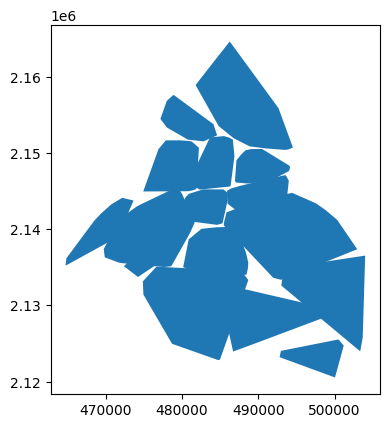

In [18]:
import matplotlib.pyplot as plt

gdf_agrupado = df_projected.dissolve(by='alcaldi').convex_hull

gdf_agrupado.plot()

plt.show()


El paso anterior guardalo como una capa y graficalo en conjunto a la grafica del paso 1

/tmp/ipykernel_65/2143989153.py:14: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


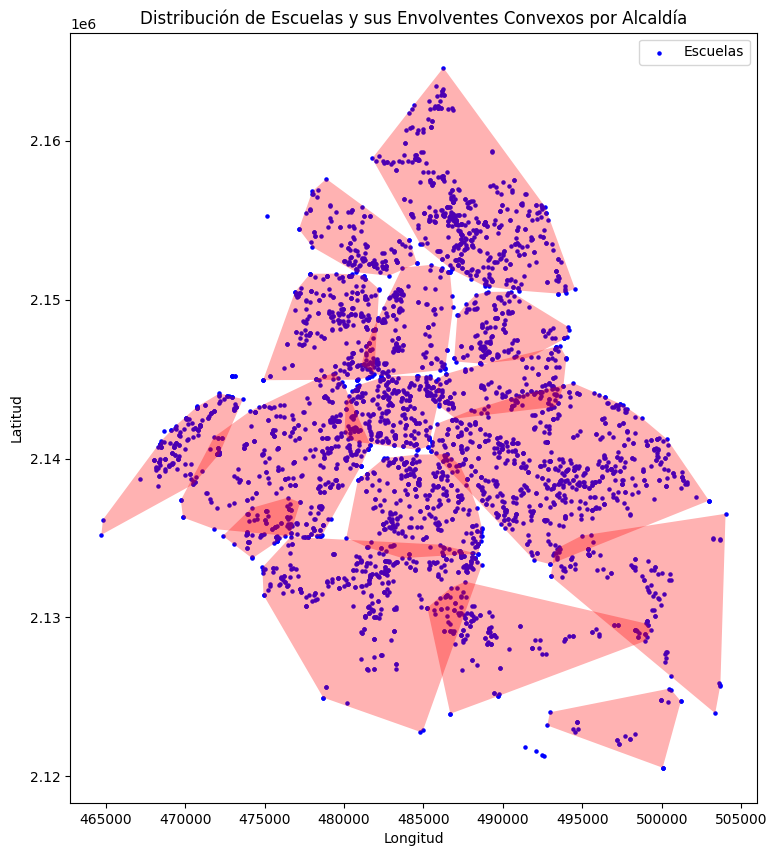

In [23]:


# Convertir los envolventes convexos en un GeoDataFrame
gdf_agrupado = gpd.GeoDataFrame(geometry=gdf_agrupado)

# Configurar la visualización
fig, ax = plt.subplots(figsize=(10, 10))

# Graficar las escuelas originales
df_projected.plot(ax=ax, color='blue', markersize=5, label='Escuelas')

# Graficar los envolventes convexos
gdf_agrupado.plot(ax=ax, color='red', alpha=0.3, label='Envolventes Convexos')

# Añadir leyendas y etiquetas
plt.legend()
plt.title("Distribución de Escuelas y sus Envolventes Convexos por Alcaldía")
plt.xlabel("Longitud")
plt.ylabel("Latitud")

# Mostrar la gráfica
plt.show()

Paso 8. Crea una nueva columna en el gdf inicial llamada 'Calidad_escuela' que imprima un numero aleatorio entre 1 y 10. 
Imprime el gdf


In [24]:
import numpy as np

df['Calidad_escuela'] = np.random.randint(1, 11, size=len(df))

print(df)


                                                                          nombre  \
colonia                                                                            
LOMAS DE CHAPULTEPEC                                       CENDI PART SEDI LOMAS   
SINATEL (AMPL)                                                  ARMONIA INFANTIL   
TIZAPAN_TIZAPAN SAN ANGEL                    CENDI PART. COLEGIO DE LAS BALEARES   
CUAUHTEMOC                                      CENDI PART COLEGIO CIBELES, S.C.   
LEYES DE REFORMA 3A SECCION I         CENTRO DE DESARROLLO INFANTIL KINDERGARDEN   
...                                                                          ...   
SINATEL (AMPL)                                                  ARMONIA INFANTIL   
VIEJO EJIDO SANTA URSULA COAPA                         CENDI PART MI MUNDO FELIZ   
NUEVA VALLEJO                                     CENDI PART COLEGIO BILBAO S.C.   
TLALPAN CENTRO                  CENDI PART ECOLOGICO DE DESARROLLO INFANTIL 

Paso 9. Ahora, plotea el gdf, pero vusalizando la columna 'Calidad escuela'

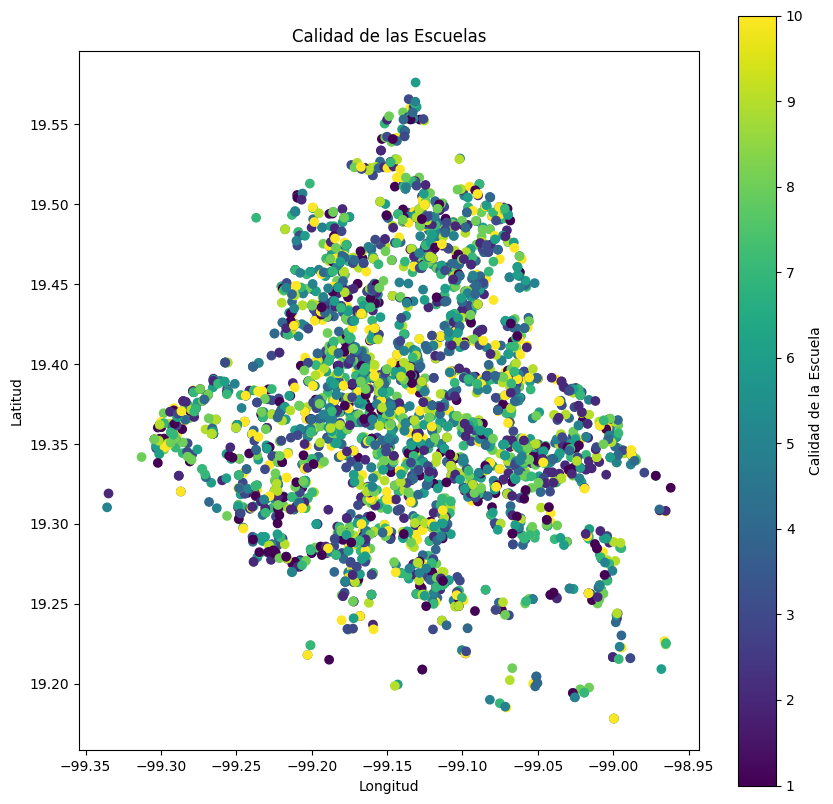

In [25]:


# Configurar la visualización
fig, ax = plt.subplots(figsize=(10, 10))

# Graficar el GeoDataFrame utilizando la columna 'Calidad_escuela' para el color
df.plot(column='Calidad_escuela', ax=ax, legend=True, 
        legend_kwds={'label': "Calidad de la Escuela"}, 
        cmap='viridis')

# Añadir título y etiquetas
plt.title("Calidad de las Escuelas")
plt.xlabel("Longitud")
plt.ylabel("Latitud")

# Mostrar la gráfica
plt.show()


Paso 10. Finalmente, plotea en escala de Rojos, en cuantiles de 4 categorias.
Recuerda que los colores deben de ser claros, inserta una leyenda

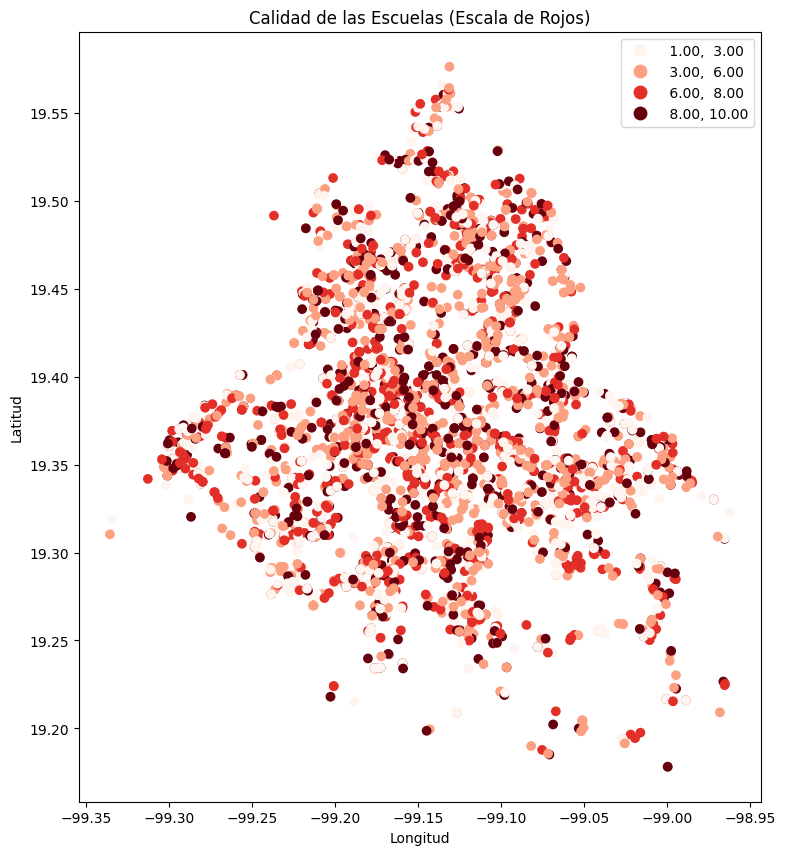

In [28]:
import matplotlib.pyplot as plt

# Configurar la visualización
fig, ax = plt.subplots(figsize=(10, 10))

# Graficar el GeoDataFrame utilizando la columna 'Calidad_escuela'
# Dividir en cuantiles y usar una escala de rojos
df.plot(column='Calidad_escuela', ax=ax, legend=True, 
        scheme='Quantiles', k=4, cmap='Reds')

# Añadir título y etiquetas
plt.title("Calidad de las Escuelas (Escala de Rojos)")
plt.xlabel("Longitud")
plt.ylabel("Latitud")

# Mostrar la gráfica
plt.show()


